In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
IBMQ.load_accounts()

In [3]:
import numpy as np
import math
from qiskit import *
%matplotlib inline

In [27]:
#initialization
q = QuantumRegister(4, 'q')
circ = QuantumCircuit(q)

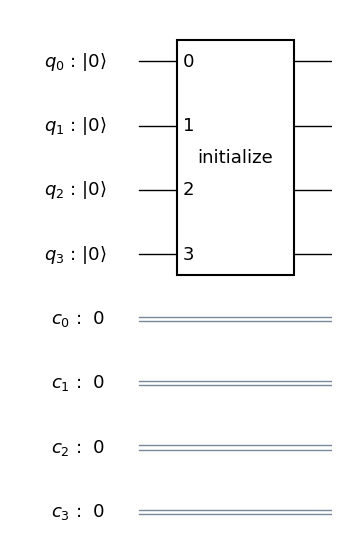

In [66]:
import math
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, BasicAer

q = QuantumRegister(4, "q")
c = ClassicalRegister(4, 'c')
circ = QuantumCircuit(q, c, name="initializer_circ")

desired_vector = [
    0,
    math.sqrt(1/120),
    math.sqrt(5/120),
    math.sqrt(4/120),
    math.sqrt(3/120),
    math.sqrt(7/120),
    math.sqrt(6/120),
    math.sqrt(14/120),
    math.sqrt(10/120),
    math.sqrt(2/120),
    math.sqrt(15/120),
    math.sqrt(8/120),
    math.sqrt(12/120),
    math.sqrt(11/120),
    math.sqrt(9/120),
    math.sqrt(13/120)]
 

circ.initialize(desired_vector, [q[0], q[1], q[2], q[3]])

circ.draw()


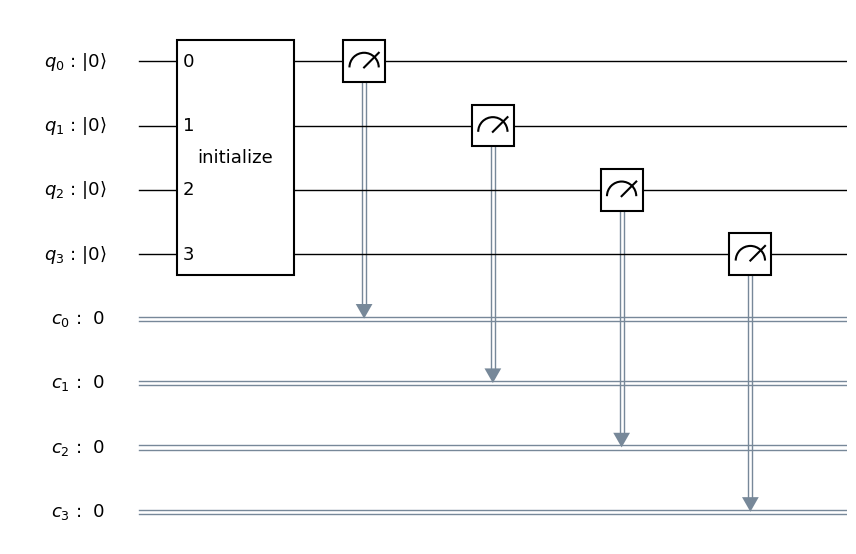

In [65]:
#postselect/measurenment
circ.measure(q[0], c[0])
circ.measure(q[1], c[1])
circ.measure(q[2], c[2])
circ.measure(q[3], c[3])
circ.draw()

In [12]:
###############################################################
# Execute on a simulator backend.
###############################################################
shots = 10000

# Desired vector
print("Desired probabilities: ")
print(str(list(map(lambda x: format(abs(x * x), '.3f'), desired_vector))))

# Initialize on local simulator
sim_backend = BasicAer.get_backend('qasm_simulator')
job = execute(circ, sim_backend, shots=shots)
result = job.result()

n_qubits_qureg = q.size
counts = result.get_counts(circ)

qubit_strings = [format(i, '0%sb' % n_qubits_qureg) for
                 i in range(2 ** n_qubits_qureg)]
print("Probabilities from simulator: ")
print([format(counts.get(s, 0) / shots, '.3f') for
       s in qubit_strings])

Desired probabilities: 
['0.000', '0.008', '0.017', '0.025', '0.033', '0.042', '0.050', '0.058', '0.067', '0.075', '0.083', '0.092', '0.100', '0.108', '0.117', '0.125']
Probabilities from simulator: 
['0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000']


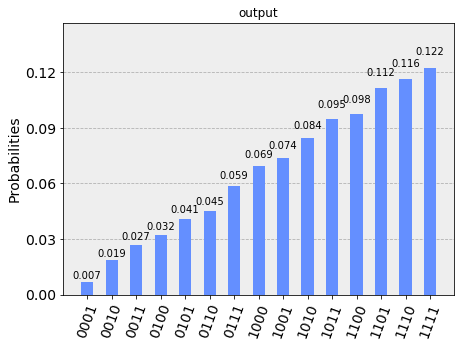

In [13]:
from qiskit.tools.visualization import plot_histogram

plot_histogram(counts, title="output")

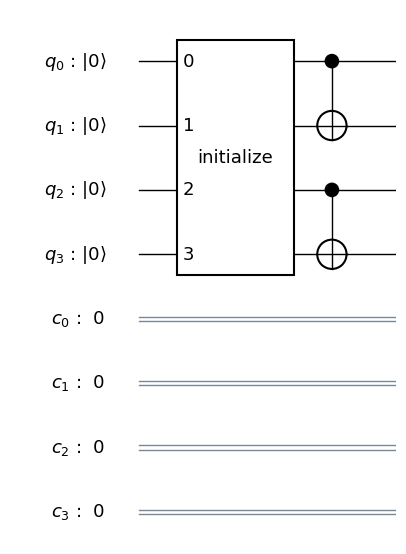

In [67]:

circ.cx(q[0],q[1])
circ.cx(q[2],q[3])
circ.draw(output='mpl')


In [24]:
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute

from qiskit.providers.aer import UnitarySimulator


In [32]:
# Select the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')

# Execute and get counts
result = execute(circ, simulator).result()
unitary = result.get_unitary(circ)
print("Circuit unitary:\n", unitary)

print(np.absolute(unitary))

Circuit unitary:
 [[ 0.        +0.j -0.09128709+0.j  0.        +0.j  0.20412415+0.j
   0.        +0.j  0.17480147+0.j  0.        +0.j -0.39086798+0.j
   0.        +0.j  0.16547191+0.j  0.        +0.j -0.37000643+0.j
   0.        +0.j -0.31685458+0.j  0.        +0.j  0.70850838+0.j]
 [ 0.09128709+0.j  0.        +0.j -0.20412415+0.j  0.        +0.j
  -0.17480147+0.j  0.        +0.j  0.39086798+0.j  0.        +0.j
  -0.16547191+0.j  0.        +0.j  0.37000643+0.j  0.        +0.j
   0.31685458+0.j  0.        +0.j -0.70850838+0.j  0.        +0.j]
 [ 0.12909944+0.j -0.15811388+0.j  0.05773503+0.j -0.07071068+0.j
  -0.24720662+0.j  0.30276504+0.j -0.11055416+0.j  0.13540064+0.j
  -0.23401262+0.j  0.28660575+0.j -0.10465362+0.j  0.12817399+0.j
   0.44810005+0.j -0.54880823+0.j  0.20039643+0.j -0.2454345 +0.j]
 [ 0.15811388+0.j  0.12909944+0.j  0.07071068+0.j  0.05773503+0.j
  -0.30276504+0.j -0.24720662+0.j -0.13540064+0.j -0.11055416+0.j
  -0.28660575+0.j -0.23401262+0.j -0.12817399+0.j -0.10

In [33]:
import cmath
print("Circuit unitary:\n", unitary.real)

Circuit unitary:
 [[ 0.         -0.09128709  0.          0.20412415  0.          0.17480147
   0.         -0.39086798  0.          0.16547191  0.         -0.37000643
   0.         -0.31685458  0.          0.70850838]
 [ 0.09128709  0.         -0.20412415  0.         -0.17480147  0.
   0.39086798  0.         -0.16547191  0.          0.37000643  0.
   0.31685458  0.         -0.70850838  0.        ]
 [ 0.12909944 -0.15811388  0.05773503 -0.07071068 -0.24720662  0.30276504
  -0.11055416  0.13540064 -0.23401262  0.28660575 -0.10465362  0.12817399
   0.44810005 -0.54880823  0.20039643 -0.2454345 ]
 [ 0.15811388  0.12909944  0.07071068  0.05773503 -0.30276504 -0.24720662
  -0.13540064 -0.11055416 -0.28660575 -0.23401262 -0.12817399 -0.10465362
   0.54880823  0.44810005  0.2454345   0.20039643]
 [ 0.18257419 -0.20412415 -0.21942686  0.24532669  0.09534626 -0.10660036
  -0.11459194  0.12811769 -0.33094382  0.37000643  0.39774497 -0.44469239
  -0.17282977  0.19322956  0.20771553 -0.23223303]
 [ 

In [68]:
# Import Aer
from qiskit import BasicAer

# Run the quantum circuit on a statevector simulator backend
backend = BasicAer.get_backend('statevector_simulator')
# Create a Quantum Program for execution 
job = execute(circ, backend)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)
print(np.absolute(outputstate))

[0.   +0.j 0.183+0.j 0.204+0.j 0.091+0.j 0.316+0.j 0.329+0.j 0.274+0.j
 0.303+0.j 0.289+0.j 0.258+0.j 0.354+0.j 0.129+0.j 0.158+0.j 0.342+0.j
 0.224+0.j 0.242+0.j]
[0.    0.183 0.204 0.091 0.316 0.329 0.274 0.303 0.289 0.258 0.354 0.129
 0.158 0.342 0.224 0.242]


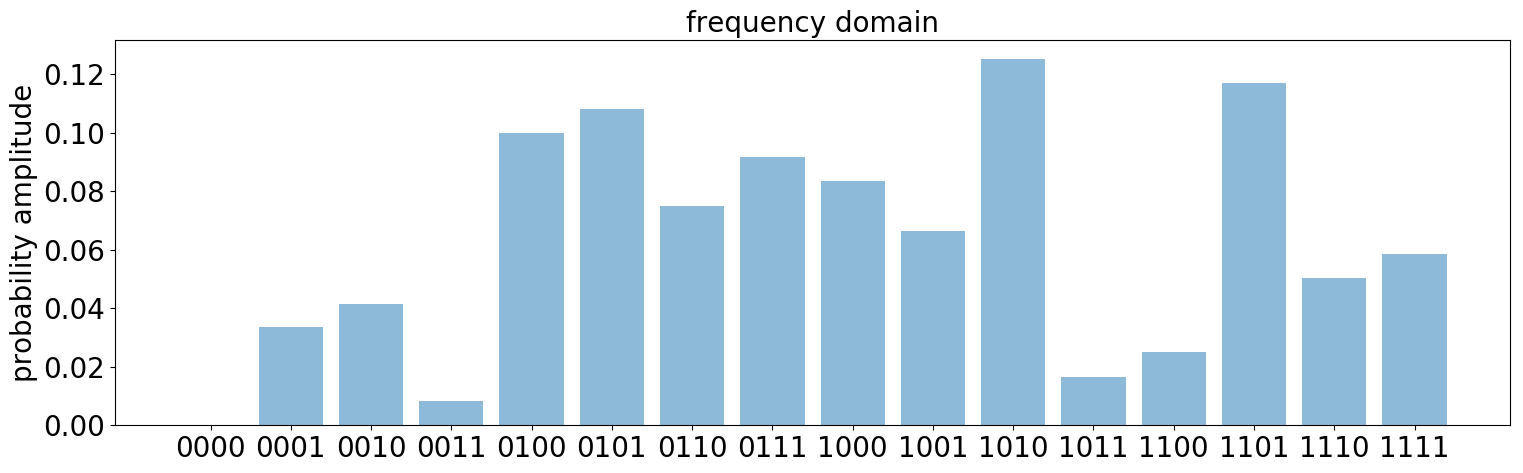

[0.       0.033489 0.041616 0.008281 0.099856 0.108241 0.075076 0.091809
 0.083521 0.066564 0.125316 0.016641 0.024964 0.116964 0.050176 0.058564]


In [62]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(18,5))
#objects = ('0', '1', '2', '3', '4', '5','6','7','8','9','10','11',
 #          '12','13','14','15')
objects = ('0000', '0001', '0010', '0011', '0100', '0101','0110','0111','1000','1001','1010','1011',
           '1100','1101','1110','1111')
y_pos = np.arange(len(objects))
x=np.absolute(outputstate)
x=np.power(x, 2)
x=x[0:16]
plt.bar(y_pos, x, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('probability amplitude')
plt.title('frequency domain')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.show()
print(x)